In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
from dm_control import suite

from environments.observation_domains import estimate_domains
import environments
from environments import point
from environments import reacher_explore
from environments import hallway
from environments import ball_in_cup_explore

In [5]:
def render(physics, camera_id=None, height=480, width=480, **kwargs):
    args = {'height': height, 'width': width, **kwargs}
    if camera_id is not None:
        args['camera_id'] = camera_id
    img = physics.render(**args)
    plt.figure(figsize = (10,10))
    plt.imshow(img)

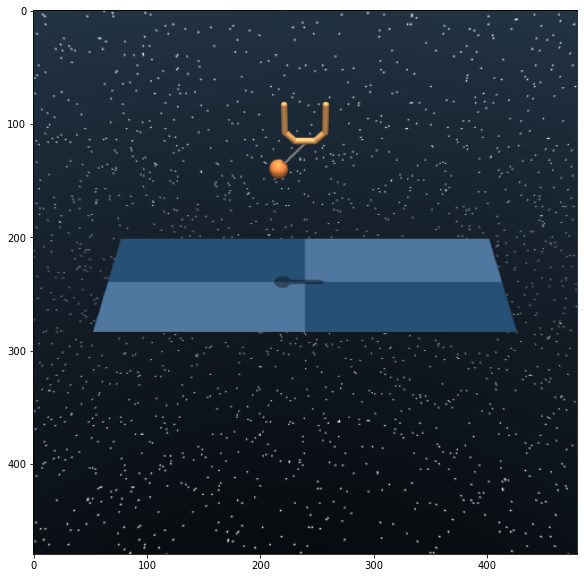

In [72]:
reload(ball_in_cup_explore)
env = suite.load('ball_in_cup_explore', 'catch')
env.reset()
render(env.physics)

In [73]:
estimate_domains('ball_in_cup_explore', 'catch')

/home/will/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


(OrderedDict([('position',
               DeviceArray([-0.24999996, -0.2806425 , -0.19860573, -0.19612767], dtype=float32)),
              ('velocity',
               DeviceArray([-1.3179755, -1.4795201, -1.2515078, -2.8917093], dtype=float32))]),
 OrderedDict([('position',
               DeviceArray([0.265898  , 0.19719523, 0.47615352, 0.27073643], dtype=float32)),
              ('velocity',
               DeviceArray([1.4794071, 1.2212688, 1.4865134, 0.9554692], dtype=float32))]))

In [6]:
physics = env.physics

In [14]:
physics.named.model.geom_size

FieldIndexer(geom_size):
               x         y         z         
0     ground [ 4         0.1       0.1     ]
1     wall_x [ 0.02      0.1       0.02    ]
2     wall_y [ 3         0.02      0.02    ]
3 wall_neg_x [ 0.1       0.02      0.02    ]
4 wall_neg_y [ 3         0.02      0.02    ]
5 distractor [ 0.1       0         0       ]
6     target [ 0.05      0         0       ]
7  pointmass [ 0.01      0         0       ]

In [8]:
physics.named.model.jnt_range

FieldIndexer(jnt_range):
0 root_x [-4         4       ]
1 root_y [-0.1       0.1     ]

In [9]:
with physics.reset_context():
    physics.named.model.geom_pos['wall_x'][0] = -1
    physics.named.model.geom_pos['wall_neg_x'][0] = 1

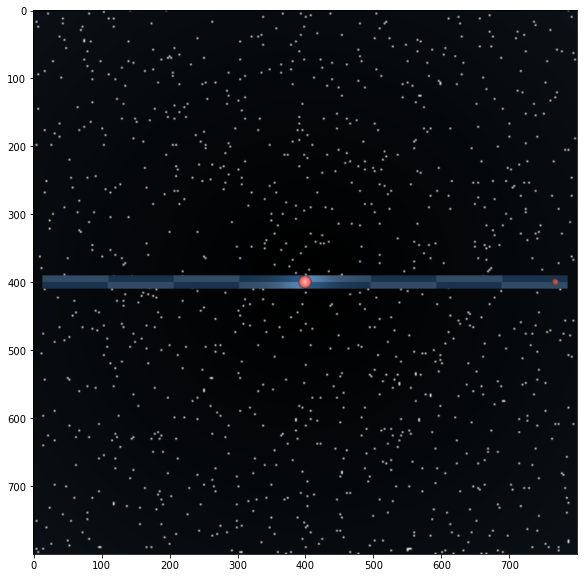

In [10]:
render(physics, camera='fixed')